# Evaluation of Climate training

In [38]:
# System
import os
import sys

# Externals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Locals
sys.path.append('..')
from datasets import get_datasets

In [18]:
%matplotlib inline

In [19]:
plt.rcParams.update({'font.size': 14})

In [25]:
def load_history(result_dir):
    history_file = os.path.join(result_dir, 'summaries_0.csv')
    return pd.read_csv(history_file, delim_whitespace=True)

In [26]:
ls /global/cscratch1/sd/sfarrell/nesap-stl/predrnn-climate/results

checkpoints/  out_1.log  out_3.log        summaries_1.csv  summaries_3.csv
out_0.log     out_2.log  summaries_0.csv  summaries_2.csv


In [28]:
result_dir = '/global/cscratch1/sd/sfarrell/nesap-stl/predrnn-climate/results'

In [31]:
history = load_history(result_dir)

In [34]:
history

,epoch,train_loss,train_time,valid_loss,valid_time
0,0,0.127227,240.052571,0.054042,225.763082
1,1,0.046074,241.946064,0.044565,222.999687
2,2,0.042503,235.446768,0.038915,220.992565
3,3,0.039323,239.297154,0.037001,223.823162
4,4,0.037703,229.576320,0.036050,223.911753
5,5,0.036853,232.608268,0.035713,223.876794
6,6,0.036326,229.469527,0.035089,225.356676
7,7,0.035849,229.226531,0.034747,226.250795
8,8,0.035660,229.204993,0.034732,224.326785
9,9,0.035326,229.246454,0.034494,226.811394


Text(0, 0.5, 'Loss')

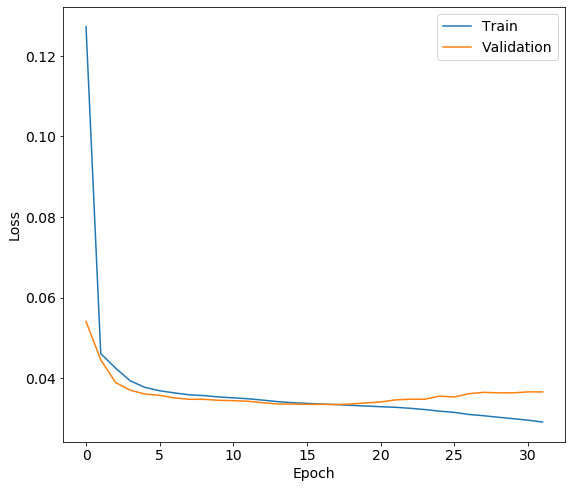

In [36]:
fig, ax = plt.subplots(figsize=(9, 8))
ax.plot(history.train_loss, label='Train')
ax.plot(history.valid_loss, label='Validation')
ax.legend(loc=0)
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

## Compute persistent model baseline on the validation set

In [43]:
# Data config
data_file = '/global/cfs/cdirs/m1759/sfarrell/nesap-stl/data/climate.npz'
n_train = 8192
n_valid = 2048
patch_size = 4
seq_len = 16

In [44]:
train_data, valid_data, _ = get_datasets('climate', data_file=data_file,
                                         n_train=n_train, n_valid=n_valid,
                                         patch_size=patch_size, seq_len=seq_len)

In [55]:
persistent_mse = ((valid_data.data[1:] - valid_data.data[:-1])**2).mean()

In [58]:
print('Best validation MSE:', history.valid_loss.min())
print('Persistent baseline MSE:', persistent_mse)

Best validation MSE: 0.033438
Persistent baseline MSE: 0.035942197


## Develop code to load all summaries

TBD

In [11]:
# Let's develop the code to load all summaries into one dataframe
result_dir = '/global/cscratch1/sd/sfarrell/nesap-stl/predrnn-climate/results'